In [1]:
import numpy as np
import math as mp
import pandas as pd

In [2]:
# Some parameter initialization. 
sigma = 5
beta = 1/(1.05)
W = 1
N = np.linspace(15,23,50)



In [3]:

tau1= -1/np.log(beta) - N
tau1[tau1<0] = 0  
tau1 = np.ceil(tau1)
tprod1=  beta**tau1 * (tau1 + N)


In [4]:
tau1

array([6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 3.,
       3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:

def generate_pattern_array_with_extra_rows(tau):
    # 1) Create the original n×n pattern
    n = len(tau)+ int(np.min(tau))
    m = int(np.max(tau)) + int(np.min(tau))

    mx = int(max(tau))
    missing_count = len(set(range(int(max(tau) )+ 1)) - set(tau))
    print(missing_count)


    A = np.ones((m+2, n+missing_count), dtype=float)
    count = 0
    for i in range(1, m+2):
        for j in range(len(tau[tau == i-1])):
            A[i, n- i-j - count] = 0.95  # 0.9 shifts diagonally from right to left as we go down
        if len(tau[tau == i-1]) > 1:
            count += len(tau[tau == i-1])-1
    # 2) Create the two extra rows:
    #    (a) one row with 0.9 at the leftmost column,
    #    (b) one row of all ones.

    row_all_ones = np.ones(n+missing_count, dtype=float)
    A_extended = np.vstack([A,row_all_ones])
    A_extended = A_extended[:,0:n - int(np.min(tau))]

    return A_extended

# Example usage:
n = 11
A= generate_pattern_array_with_extra_rows(tau1)
print(A)
print(np.shape(A))
df = pd.DataFrame(A)
df


0
[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
  0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  0.95 0.95 0.95 0.95 0.95 0.95 1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.   1.   1.   0.95 0.95 0.95 0.95 0.95 0.95
  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1. 

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
4,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
5,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
6,1.00,1.00,1.00,1.00,0.95,0.95,0.95,0.95,0.95,0.95,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
7,0.95,0.95,0.95,0.95,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
8,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


0
0
0
0


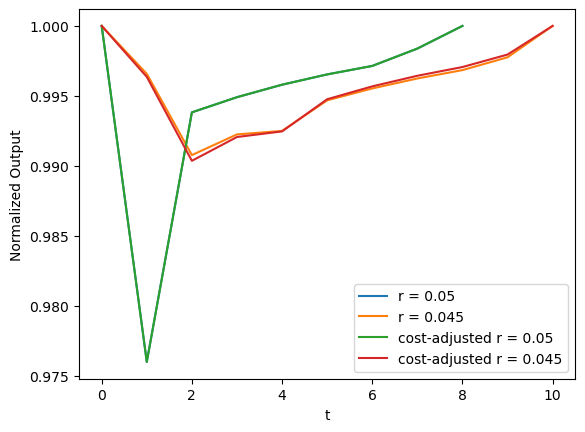

In [ ]:
import matplotlib.pyplot as plt
beta_stuff = 1/(1.05)
for i in [0.05, 0.045]:
    beta = 1/(1+i)
    tau1= -1/np.log(beta) - N
    tau1[tau1<0] = 0  
    tau1 = np.ceil(tau1)
    tprod1=  beta**tau1 * (tau1 + N)   
    A= generate_pattern_array_with_extra_rows(tau1)
    
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='r = {}'.format(i))
for i in [0.05, 0.045]:
    beta = 1/(1+i)
    tau1= -1/np.log(beta) - N
    tau1[tau1<0] = 0  
    tau1 = np.ceil(tau1)
    tprod1=  beta_stuff**tau1 * (tau1 + N)   
    A= generate_pattern_array_with_extra_rows(tau1)
    
    P0 = (np.sum(1/(A*tprod1)**(1-sigma),axis =1))**(1/(1-sigma))
    plt.plot( (1/P0)*P0[0], label='cost-adjusted r = {}'.format(i))
plt.xlabel('t')
plt.title('Productivity Shock Under Different Interest Rates')

plt.ylabel('Normalized Output')
plt.legend()
plt.show()
